## Setup

In [15]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

## Make a 2D dataset


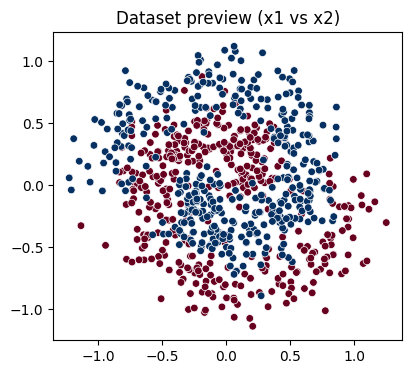

In [16]:
def make_spiral(n=500, noise=0.2, seed=0):
    rng = np.random.default_rng(seed)
    n2 = n // 2
    t = np.linspace(0, 2*np.pi, n2)
    r = np.linspace(0.2, 1.0, n2)
    
  
    x1 = r * np.cos(t)
    y1 = r * np.sin(t)
    x2 = -r * np.cos(t)
    y2 = -r * np.sin(t)
    
    x1y1 = np.c_[x1, y1] + noise * rng.standard_normal((n2, 2))
    x2y2 = np.c_[x2, y2] + noise * rng.standard_normal((n2, 2))
    
    X_raw = np.vstack([x1y1, x2y2]).astype('float32')
    y = np.r_[np.zeros(n2), np.ones(n2)].astype('float32')
    
  
    X = np.c_[
        X_raw[:,0],                  # x1
        X_raw[:,1],                  # x2
        X_raw[:,0]*X_raw[:,1],       # x1*x2
        X_raw[:,0]**2,               # x1^2
        X_raw[:,1]**2                # x2^2
    ].astype('float32')
    
    return X, y


X, y = make_spiral(n=800, noise=0.15, seed=0)

plt.figure(figsize=(4.5,4))
plt.scatter(X[:,0], X[:,1], c=y, cmap='RdBu', s=30, edgecolor='white', linewidth=0.5)
plt.title('Dataset preview (x1 vs x2)')
plt.show()

## Build and train a small network


In [17]:
idx = np.arange(len(X))
np.random.shuffle(idx)
split = int(0.8 * len(X))
train_idx, val_idx = idx[:split], idx[split:]


In [18]:
X_train_t = torch.from_numpy(X[train_idx])
y_train_t = torch.from_numpy(y[train_idx]).unsqueeze(1)
X_val_t   = torch.from_numpy(X[val_idx])
y_val_t   = torch.from_numpy(y[val_idx]).unsqueeze(1)

In [19]:
model = nn.Sequential(
    nn.Linear(5, 4),
    nn.Tanh(),
    nn.Linear(4, 3),
    nn.Tanh(),
    nn.Linear(3, 1),
    nn.Sigmoid()
)


In [20]:
model2 = nn.Sequential(
    nn.Linear(5, 4),
    nn.Tanh(),
    
    nn.Linear(4, 4),
    nn.Tanh(),
    
    nn.Linear(4, 3),
    nn.Tanh(),
    
    nn.Linear(3, 3),
    nn.Tanh(),
    
    nn.Linear(3, 3),
    nn.Tanh(),
    
    nn.Linear(3, 3),
    nn.Tanh(),
    
    nn.Linear(3, 1),
    nn.Sigmoid()
)

In [21]:
model

Sequential(
  (0): Linear(in_features=5, out_features=4, bias=True)
  (1): Tanh()
  (2): Linear(in_features=4, out_features=3, bias=True)
  (3): Tanh()
  (4): Linear(in_features=3, out_features=1, bias=True)
  (5): Sigmoid()
)

In [22]:
model2

Sequential(
  (0): Linear(in_features=5, out_features=4, bias=True)
  (1): Tanh()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): Tanh()
  (4): Linear(in_features=4, out_features=3, bias=True)
  (5): Tanh()
  (6): Linear(in_features=3, out_features=3, bias=True)
  (7): Tanh()
  (8): Linear(in_features=3, out_features=3, bias=True)
  (9): Tanh()
  (10): Linear(in_features=3, out_features=3, bias=True)
  (11): Tanh()
  (12): Linear(in_features=3, out_features=1, bias=True)
  (13): Sigmoid()
)

In [23]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.BCELoss()


train_losses, val_losses = [], []

for epoch in range(2000):
    # training
    model.train()
    optimizer.zero_grad()
    preds = model(X_train_t)
    loss = loss_fn(preds, y_train_t)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())
    
    # validation
    model.eval()
    with torch.no_grad():
        val_preds = model(X_val_t)
        val_loss = loss_fn(val_preds, y_val_t)
        val_losses.append(val_loss.item())

# accuracy
model.eval()
with torch.no_grad():
    val_probs = model(X_val_t)
    val_pred_labels = (val_probs > 0.5).float()
    val_acc = (val_pred_labels.eq(y_val_t)).float().mean().item()
print(f'Validation Accuracy: {val_acc:.4f}')

Validation Accuracy: 0.8188


In [24]:
optimizer2 = torch.optim.Adam(model2.parameters(), lr=1e-3)
train_losses2, val_losses2 = [], []

for epoch in range(2000):
    # training
    model2.train()
    optimizer2.zero_grad()
    preds2 = model2(X_train_t)
    loss2 = loss_fn(preds2, y_train_t)
    loss2.backward()
    optimizer2.step()
    train_losses2.append(loss2.item())
    
    # validation
    model2.eval()
    with torch.no_grad():
        val_preds2 = model2(X_val_t)
        val_loss2 = loss_fn(val_preds2, y_val_t)
        val_losses2.append(val_loss2.item())

# accuracy
model2.eval()
with torch.no_grad():
    val_probs2 = model2(X_val_t)
    val_pred_labels2 = (val_probs2 > 0.5).float()
    val_acc2 = (val_pred_labels2.eq(y_val_t)).float().mean().item()
print(f'Validation Accuracy: {val_acc2:.4f}')

Validation Accuracy: 0.8750


## Training and validation loss


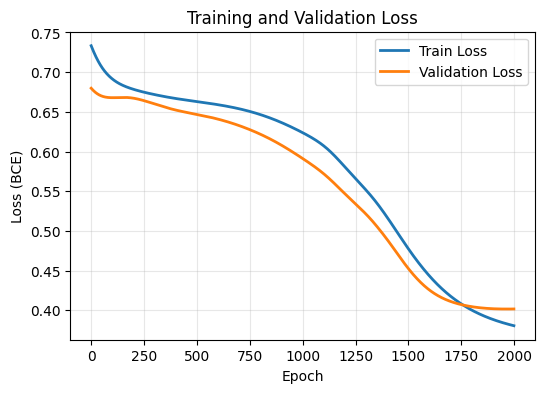

In [25]:
plt.figure(figsize=(6,4))
plt.plot(train_losses, label='Train Loss', linewidth=2)
plt.plot(val_losses, label='Validation Loss', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss (BCE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

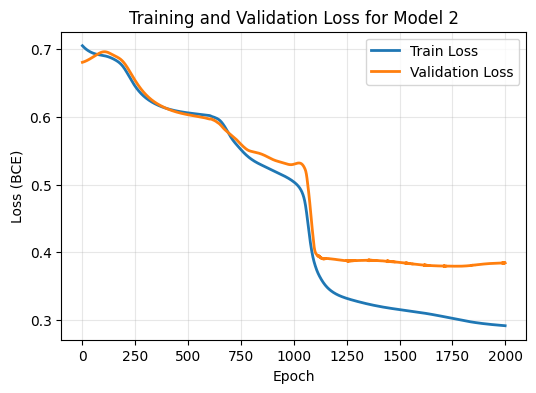

In [27]:
plt.figure(figsize=(6,4))
plt.plot(train_losses2, label='Train Loss', linewidth=2)
plt.plot(val_losses2, label='Validation Loss', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss (BCE)')
plt.title('Training and Validation Loss for Model 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Plot decision regions


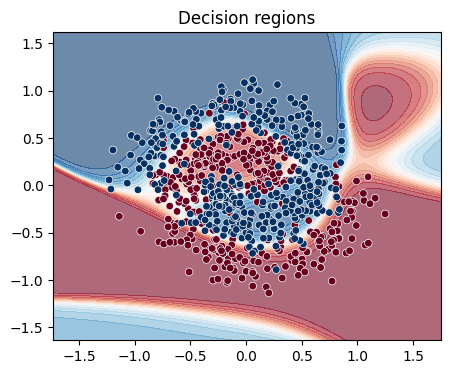

In [36]:
xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 200),
    np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 200)
)
grid = np.c_[xx.ravel(), yy.ravel()].astype('float32')


grid_poly = np.c_[
    grid[:,0],
    grid[:,1],
    grid[:,0]*grid[:,1],
    grid[:,0]**2,
    grid[:,1]**2
].astype('float32')

model.eval()
with torch.no_grad():
    grid_t = torch.from_numpy(grid_poly)
    probs = model(grid_t).detach().numpy().reshape(xx.shape)

plt.figure(figsize=(5,4))
cs = plt.contourf(xx, yy, probs, levels=20, cmap='RdBu', alpha=0.6)
plt.scatter(X[:,0], X[:,1], c=y, cmap='RdBu', edgecolor='white', linewidth=0.5, s=30)
plt.title('Decision regions')
plt.show()


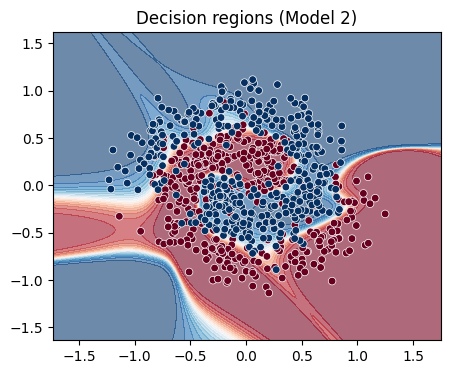

In [28]:
xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 200),
    np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 200)
)
grid = np.c_[xx.ravel(), yy.ravel()].astype('float32')

grid_poly = np.c_[
    grid[:,0],
    grid[:,1],
    grid[:,0]*grid[:,1],
    grid[:,0]**2,
    grid[:,1]**2
].astype('float32')

model2.eval()
with torch.no_grad():
    grid_t2 = torch.from_numpy(grid_poly)
    probs2 = model2(grid_t2).detach().numpy().reshape(xx.shape)

plt.figure(figsize=(5,4))
plt.contourf(xx, yy, probs2, levels=20, cmap='RdBu', alpha=0.6)
plt.scatter(X[:,0], X[:,1], c=y, cmap='RdBu', edgecolor='white', linewidth=0.5, s=30)
plt.title('Decision regions (Model 2)')
plt.show()
